<h1> <center>LEITURA E VISUALIZAÇÃO INICIAL DE DADOS</center> </h1>
<h3> <center>ACCESSO À DADOS DE SATÉLITES VIA API NASA</center> </h3>
<center><img width="700" height="500" src="https://cdn.pixabay.com/photo/2010/12/05/international-space-station-974_1280.jpg"></center>
<center> Data Source: <a href='https://cdaweb.gsfc.nasa.gov/index.html/'>Coordinated Data Analysis Web (CDAWeb)</a> </center>
<center> API Documentation: <a href='https://cdaweb.gsfc.nasa.gov/WebServices/REST/py/cdasws/'>Package for accessing the Coordinate Data Analysis System (CDAS) web services </a> </center>

#### Para a coleta dos dados é necessária a instalação da API via "pip install cdasws", com isso é possível acessar os dados diretamente do _Coordinate Data Analysis System (CDAS) web services_.

In [1]:
# Importing libraries
#Visualização dos dados
import matplotlib.pylab as plt
%matplotlib inline
#tratamento dos dados
import pandas as pd
import datetime
#Bibliotecas para importação dados da Api da NASA
from cdasws import CdasWs
from cdasws import TimeInterval
# Retirar avisos
import warnings
warnings.filterwarnings('ignore')

cdas = CdasWs()

#### Após a importação das bibliotecas o nosso ambiente está pronto para iniciar o carregamento dos dados, inicialmente iremos fazer alguns testes com a API. Vamos explorar as seguintes classes:
* get_instrument_types
* get_instruments
* get_observatories
* get_observatory_groups

##### A classe "get_instrument_types" retorna uma matriz de dicionários com os tipos de instrumentos disponíveis na base de dados que espelha a seguinte [estrutura](https://cdaweb.gsfc.nasa.gov/WebServices/REST/CDAS.xsd.).

In [2]:
# Importa a lista com todos os instrumentos disponíves na base de dados da NASA
todos_instrumentos = cdas.get_instrument_types()
#Mostra os tipos de instrumentos disponíveis
for instrumento in todos_instrumentos:
    print(instrumento.values())

dict_values(['Activity Indices'])
dict_values(['Electric Fields (space)'])
dict_values(['Electron Precipitation Bremsstrahlung'])
dict_values(['Energetic Particle Detector'])
dict_values(['Engineering'])
dict_values(['Ephemeris/Attitude/Ancillary'])
dict_values(['Gamma and X-Rays'])
dict_values(['Ground-Based HF-Radars'])
dict_values(['Ground-Based Imagers'])
dict_values(['Ground-Based Magnetometers, Riometers, Sounders'])
dict_values(['Ground-Based VLF/ELF/ULF, Photometers'])
dict_values(['Housekeeping'])
dict_values(['Imager (space)'])
dict_values(['Imagers (Space)'])
dict_values(['Imagers (space)'])
dict_values(['Imaging and Remote Sensing (ITM/Earth)'])
dict_values(['Imaging and Remote Sensing (Magnetosphere/Earth)'])
dict_values(['Imaging and Remote Sensing (Sun)'])
dict_values(['Magnetic Fields (Balloon)'])
dict_values(['Magnetic Fields (space)'])
dict_values(['Particles (space)'])
dict_values(['Plasma and Solar Wind'])
dict_values(['Pressure gauge (space)'])
dict_values(['Radio 

##### Podemos também filtra os instrumentos por observatório, ou grupo de observatórios

In [3]:
#assumindo o observatório AC que está dentro do grupo de observatórios ACE
instrumentos_obs_AC = cdas.get_instrument_types(observatory='AC')
#Mostra os tipos instrumentos disponíveis
print("###### Observatório AC ######")
for instrumento in instrumentos_obs_AC:
    print(instrumento.values())


instrumentos_obs_group_AC = cdas.get_instrument_types(observatoryGroup='ACE')
#Mostra os tipos instrumentos disponíveis
print("\n\n###### Grupo de Observatórios ACE ######")
for instrumento in instrumentos_obs_group_AC:
    print(instrumento.values())

###### Observatório AC ######
dict_values(['Ephemeris/Attitude/Ancillary'])
dict_values(['Magnetic Fields (space)'])
dict_values(['Particles (space)'])
dict_values(['Plasma and Solar Wind'])


###### Grupo de Observatórios ACE ######
dict_values(['Activity Indices'])
dict_values(['Electric Fields (space)'])
dict_values(['Ephemeris/Attitude/Ancillary'])
dict_values(['Magnetic Fields (space)'])
dict_values(['Particles (space)'])
dict_values(['Plasma and Solar Wind'])


##### Como o esperado os instrumentos que estão no observatório AC também estão no grupo de observatórios ACE, pois um pertence ao outro. Podemos ver também que no grupo ACE possuem outros observatórios com instrumentos diferentes do observatório AC.  
##### Com isso já conseguimos identificar em qual observatório/grupo de observatórios, conseguimos encontrar os dados dos instrumentos que necessitamos.

##### Podemos também ter uma lista e a descrição dos instrumentos disponíveis utilizando a classe "get_intruments()". Como temos muitos instrumentos cadastrados para essa classe é bom definirmos um observatório para verificar os instrumentos disponíveis, ou um tipo de instrumento específico.

In [4]:
# Importa a lista com os instrumentos disponíves na base de dados, considerando o observatório AC
# e depois o tipo de instrumento Plasma and Solar Wind
instrumentos_obs_AC = cdas.get_instruments(observatory='AC')
#Mostra os instrumentos disponíveis tendo o nome, uma descrição curta e uma descrição completa
print("###### Observatório AC ######")
for instrumento in instrumentos_obs_AC:
    print(instrumento.values())


instrumentos_tipo_SW = cdas.get_instruments(instrumentType='Plasma and Solar Wind')
#Mostra os instrumentos disponíveis tendo o nome, uma descrição curta e uma descrição completa
print("\n\n###### Tipo de instrumento Plasma and Solar Wind ######")
for instrumento in instrumentos_tipo_SW:
    print(instrumento.values())

###### Observatório AC ######
dict_values(['CRIS', 'ACE Cosmic Ray Isotope Spectrometer', 'ACE Cosmic Ray Isotope Spectrometer'])
dict_values(['DEF', 'Definitive Data ', 'Definitive Data '])
dict_values(['EPAM', 'ACE Electron Proton Alpha Monitor', 'ACE Electron Proton Alpha Monitor'])
dict_values(['EPM', 'ACE Electron, Proton, and Alpha Monitor', 'ACE Electron, Proton, and Alpha Monitor'])
dict_values(['GIFWALK', '', ''])
dict_values(['MAG', 'ACE Magnetic Field Instrument', 'ACE Magnetic Field Instrument'])
dict_values(['MFI', 'ACE Magnetic Field Instrument', 'ACE Magnetic Field Instrument'])
dict_values(['SEPICA', 'The Solar Energetic Particle Ionic Charge Analyzer ', 'The Solar Energetic Particle Ionic Charge Analyzer '])
dict_values(['SIS', 'ACE Solar Isotope Spectrometer', 'ACE Solar Isotope Spectrometer'])
dict_values(['SWE', 'ACE Solar Wind Electron Proton Alpha Monitor', 'ACE Solar Wind Electron Proton Alpha Monitor'])
dict_values(['SWEP', 'ACE Solar Wind Electron Proton Alpha 

##### Como vimos a o uso da classe passando como argumento o tipo do instrumento ainda retorna muitos resultados, então é interessante definir uma junção entre o tipo do instrumento e o observatório.

##### Agora para sabermos quais os observatórios disponíveis podemos utilizar a classe "get_observatories()", retornando todos os observatórios na base de dados, podemos também utilizar os argumentos de instrumento e tipo de instrumento para refinar a lista.

In [5]:
# Importa a lista com os onservatórios disponíves na base de dados
observatorios_geral = cdas.get_observatories()
#Mostra os observatórios disponíveis tendo o nome, uma descrição curta e uma descrição completa
for observatorio in observatorios_geral:
    print(observatorio.values())

dict_values(['(null)', '(null)', '(null)'])
dict_values(['AC', 'Advanced Composition Explorer', 'Advanced Composition Explorer'])
dict_values(['ACE', 'ACE', 'ACE'])
dict_values(['ALSEP', 'Apollo Lunar Surface Experiment Package', 'Apollo Lunar Surface Experiment Package'])
dict_values(['AMPTE-CCE', 'Active Magnetospheric Particle Tracer Explorers Charge Composition Explorer', 'Active Magnetospheric Particle Tracer Explorers Charge Composition Explorer'])
dict_values(['Ahead', 'Solar Terrestrial Relations Observatory ` of the Sun-Earth Line', 'Solar Terrestrial Relations Observatory ` of the Sun-Earth Line'])
dict_values(['Alouette-2', 'International Satellite for Ionosphere Studies 1', 'International Satellite for Ionosphere Studies 1'])
dict_values(['Arase(ERG)', 'Arase(ERG)', 'Arase(ERG)'])
dict_values(['BEPICOLOMBO', ' Bepicolombo', ' Bepicolombo'])
dict_values(['BORRELLY', ' Borrelly', ' Borrelly'])
dict_values(['Behind', 'Solar Terrestrial Relations Observatory . of the Sun-Earth 

In [6]:
#Mostra os observatórios disponíveis com instrumentos do tipo tendo o nome, uma descrição curta e uma descrição completa
observatorios_com_SW = cdas.get_observatories(instrumentType='Plasma and Solar Wind')
print("###### Tipo de instrumento Plasma and Solar Wind ######")
for observatorio in observatorios_com_SW:
    print(observatorio.values())

###### Tipo de instrumento Plasma and Solar Wind ######
dict_values(['AC', 'Advanced Composition Explorer', 'Advanced Composition Explorer'])
dict_values(['ALSEP', 'Apollo Lunar Surface Experiment Package', 'Apollo Lunar Surface Experiment Package'])
dict_values(['C1', 'Cluster spacecraft 1', 'Cluster spacecraft 1'])
dict_values(['C2', 'Cluster spacecraft 2', 'Cluster spacecraft 2'])
dict_values(['C3', 'Cluster spacecraft 3', 'Cluster spacecraft 3'])
dict_values(['C4', 'Cluster spacecraft 4', 'Cluster spacecraft 4'])
dict_values(['DSCOVR', 'Deep Space Climate Observatory', 'Deep Space Climate Observatory'])
dict_values(['EQ', 'Equator-S', 'Equator-S'])
dict_values(['GEOTAIL', 'Geomagnetic Tail', 'Geomagnetic Tail'])
dict_values(['Genesis', ' Genesis', ' Genesis'])
dict_values(['HELIOS-1', 'Helios-1', 'Helios-1'])
dict_values(['HELIOS-2', 'Helios-2', 'Helios-2'])
dict_values(['Helios-1', 'Helios-1', 'Helios-1'])
dict_values(['Helios-2', 'Helios-2', 'Helios-2'])
dict_values(['IMP-8', 'In

##### Com isso é possível fazer o cruzamento de onde encontrar as informações que são necessárias.  
##### Em alguns momentos é interessante saber quais observatórios pertencem a qual grupo para isso usamos a classe "get_observatory_groups()", que também pode ser segmentada por tipo de instrumento.

In [7]:
# Importa a lista com os grupos de observatórios disponíves na base de dados
observatorios_groups_geral = cdas.get_observatory_groups()
#Mostra os observatórios disponíveis tendo o nome do grupo e os observatórios que pertencem ao grupo
for groups in observatorios_groups_geral:
    print(groups.values())

dict_values(['ACE', ['AC', 'ACE', 'OMNI (1AU IP Data)']])
dict_values(['AMPTE', ['AMPTE-CCE']])
dict_values(['ARTEMIS', ['THB', 'THC']])
dict_values(['Alouette', ['Alouette-2']])
dict_values(['Apollo', ['ALSEP']])
dict_values(['Arase (ERG)', ['(null)', 'Arase(ERG)', 'ERG']])
dict_values(['BARREL', ['bar_1A', 'bar_1B', 'bar_1C', 'bar_1D', 'bar_1G', 'bar_1H', 'bar_1I', 'bar_1J', 'bar_1K', 'bar_1M', 'bar_1N', 'bar_1O', 'bar_1Q', 'bar_1R', 'bar_1S', 'bar_1T', 'bar_1U', 'bar_1V', 'bar_2A', 'bar_2B', 'bar_2C', 'bar_2D', 'bar_2E', 'bar_2F', 'bar_2I', 'bar_2K', 'bar_2L', 'bar_2M', 'bar_2N', 'bar_2O', 'bar_2P', 'bar_2Q', 'bar_2T', 'bar_2W', 'bar_2X', 'bar_2Y', 'bar_3A', 'bar_3B', 'bar_3C', 'bar_3D', 'bar_3E', 'bar_3F', 'bar_3G', 'bar_4A', 'bar_4B', 'bar_4C', 'bar_4D', 'bar_4E', 'bar_4F', 'bar_4G', 'bar_4H', 'bar_5A']])
dict_values(['BepiColumbo', ['BEPICOLOMBO']])
dict_values(['CNOFS', ['CNOFS']])
dict_values(['CRRES', ['CRRES Satellite']])
dict_values(['Cassini', ['CASSINI', 'Cassini']])
dict_

In [8]:
# Importa a lista com os grupos de observatórios disponíves na base de dados com o tipo de instrumento Plasma and Solar Wind
observatorios_groups_SW = cdas.get_observatory_groups(instrumentType='Plasma and Solar Wind')
#Mostra os observatórios disponíveis tendo o nome do grupo e os observatórios que pertencem ao grupo
for groups in observatorios_groups_SW:
    print(groups.values())

dict_values(['ACE', ['AC', 'ACE', 'OMNI (1AU IP Data)']])
dict_values(['ARTEMIS', ['THB', 'THC']])
dict_values(['Apollo', ['ALSEP']])
dict_values(['Cluster', ['C1', 'C2', 'C3', 'C4', 'CL', 'CT']])
dict_values(['DMSP', ['DMSP', 'dmsp', 'dmsp-f16', 'dmsp-f17', 'dmsp-f18']])
dict_values(['DSCOVR', ['DSCOVR']])
dict_values(['Equator-S', ['EQ']])
dict_values(['Genesis', ['Genesis']])
dict_values(['Geotail', ['GEOTAIL']])
dict_values(['Helios', ['HELIOS', 'HELIOS-1', 'HELIOS-2', 'HELIOS1', 'HELIOS2', 'Helios-1', 'Helios-2']])
dict_values(['IMP (All)', ['I8', 'IMP-8', 'IMP7', 'IMP8', 'OMNI (1AU IP Data)']])
dict_values(['ISEE', ['ISEE 1', 'ISEE-1', 'ISEE-3', 'ISEE1', 'ISEE2']])
dict_values(['ISS', ['ISS']])
dict_values(['Interball', ['INTERBALL-AURORAL', 'INTERBALL-GROUND', 'INTERBALL-TAIL']])
dict_values(['LANL', ['L1', 'LANL-97A', 'LANL1989_046', 'LANL1990_095', 'LANL1991_080', 'LANL1994_084', 'Lanl-01A', 'Lanl-02A', 'Lanl-97A', 'Lanl1989_046', 'Lanl1990_095', 'Lanl1991_080', 'Lanl1994_084'

##### Com essas classes é possível identificar onde encontrar os dados, assim rotinas de buscas e definições podem ser criadas.

#### Para começar a extrair e entender os dados presentes no CDAS. Vamos explorar as seguintes classes:
* get_datasets
* get_variables
* get_data

##### Dentro do CDAS existem diversos datasets disponíveis, esses datasets são divididos por satélites, alguns satélites possuem mais de um dataset. Para ver a lista completa dos datasets disponíveis no CDAS acesse [CDAWeb Served Heliophysics Datasets](https://cdaweb.gsfc.nasa.gov/misc/Notes.html). Tendo em mãos o dataset que tem interesse em utilizar, utilizando o get_datasets é possível observar algumas informações do dataset como:
* 'Id' - identificador do dataset
* 'Observatory' - Observatório dos dados
* 'Instrument' - Instrumento associado ao dataset
* 'ObservatoryGroup' - Grupo do observatório 
* 'InstrumentType' - Tipo de instrumento
* 'Label' - Breve descritivo dos dados
* 'TimeInterval' - Intervalo de tempo com dados disponíveis
* 'PiName' - Responsável pelos dados
* 'PiAffiliation' - Filiação do responsável dos dados (instituição)
* 'Notes' - Notas
* 'DatasetLink' - Link e descritivos para acesso direto aos dados  

##### Dentro da classe get_datasets é possível segmentar os datasets por observatório, grupo de observatórios, instrumentos, ou tipo de instrumentos. Assim depois de definir qual o tipo de instrumento quer analisar, e em qual observatório ou grupo de observatórios ele se encontra o retorno do método fica mais restrito e fácil de analisar.

In [9]:
# Apresenta todos os datasets disponíveis na base de dados, considerando o grupo de onservatórios Arase (ERG)
datasets = cdas.get_datasets(observatoryGroup=['Arase (ERG)'])
print(datasets)

[{'Id': 'ERG_HEP_L2_OMNIFLUX', 'Observatory': ['ERG'], 'Instrument': ['HEP'], 'ObservatoryGroup': ['Arase (ERG)'], 'InstrumentType': ['Particles (space)'], 'Label': 'High-energy electron experiments (HEP) Level-2 omni flux data, ARASE/ERG) - Takefumi Mitani (ISAS, JAXA)', 'TimeInterval': {'Start': '2017-03-19T23:59:58.000Z', 'End': '2021-01-30T23:59:59.000Z'}, 'PiName': 'Takefumi Mitani', 'PiAffiliation': 'ISAS, JAXA', 'Notes': 'https://cdaweb.gsfc.nasa.gov/misc/NotesE.html#ERG_HEP_L2_OMNIFLUX', 'DatasetLink': [{'Title': 'the ERG Science Center website', 'Text': 'For more information, see', 'Url': 'http://ergsc.isee.nagoya-u.ac.jp'}, {'Title': 'instrument papers in Earth, Planets and Space', 'Text': 'ERG', 'Url': 'https://www.springeropen.com/collections/erg'}]}, {'Id': 'ERG_LEPE_L2_OMNIFLUX', 'Observatory': ['ERG'], 'Instrument': ['LEPE'], 'ObservatoryGroup': ['Arase (ERG)'], 'InstrumentType': ['Particles (space)'], 'Label': 'Low-Energy Particle experiments - electron analyzer (LEP-e)

In [10]:
# Apresenta todos os datasets disponíveis na base de dados, considerando o grupo de onservatórios Arase (ERG)
# e o tipo de instrumento Magnetic Fields (space)
datasets = cdas.get_datasets(observatoryGroup=['Arase (ERG)'],
                             instrumentType='Magnetic Fields (space)')
print(datasets)

[{'Id': 'ERG_MGF_L2_8SEC', 'Observatory': ['ERG'], 'Instrument': ['MGF'], 'ObservatoryGroup': ['Arase (ERG)'], 'InstrumentType': ['Magnetic Fields (space)'], 'Label': 'Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data, ARASE/ERG - Ayako Matsuoka (Institute of Space and Astronautical Science, Japan Aerospace Exploration Agency, 3-1-1 Yoshinodai, Chuo-ku, Sagamihara, Kanagawa 252-5210, Japan)', 'TimeInterval': {'Start': '2017-03-13T12:01:18.000Z', 'End': '2021-01-30T23:59:59.000Z'}, 'PiName': 'Ayako Matsuoka', 'PiAffiliation': 'Institute of Space and Astronautical Science, Japan Aerospace Exploration Agency, 3-1-1 Yoshinodai, Chuo-ku, Sagamihara, Kanagawa 252-5210, Japan', 'Notes': 'https://cdaweb.gsfc.nasa.gov/misc/NotesE.html#ERG_MGF_L2_8SEC', 'DatasetLink': [{'Title': 'the ERG Science Center website', 'Text': 'For more information, see', 'Url': 'http://ergsc.isee.nagoya-u.ac.jp'}, {'Title': 'instrument papers in Earth, Planets and Space', 'Text': 'ERG', 'Url': 

##### Com a busca apenas utilizando o grupo de observatório podemos ver que o número de datasets que são retornados é grande, isso não é padrão para todos os grupos. Por conta disso é sempre bom definir também o tipo de instrumento de interesse. No exemplo anterior assumindo instrumentos do tipo "Magnetic Fields (space)", dentro do grupo de observatórios Arase (ERG), temos apenas um dataset disponível.

##### Com os dados dos datasets de interesse agora o próximo passo é verificar quais variáveis estão disponíveis nele, para isso utilizamos a classe get_variables(), a qual necessita do identificador (Id) do datasset como parâmetro. Para testar iremos utilizar o Id que encontramos do último resultado do dataset ERG_MGF_L2_8SEC

In [11]:
# Retorna todas as variáveis presentes no dataset ERG_MGF_L2_8SEC, e salva em um pandas dataframe
variaveis_ERG = pd.DataFrame(cdas.get_variables('ERG_MGF_L2_8SEC'))
variaveis_ERG

,Name,ShortDescription,LongDescription
0,mag_8sec_dsi,,8 sec resolution B in DSI coordinates
1,mag_8sec_gse,,8 sec resolution B in GSE coordinates
2,mag_8sec_gsm,,8 sec resolution B in GSM coordinates
3,mag_8sec_sm,,8 sec resolution B in SM coordinates
4,magt_8sec,,8 sec resolution total B
5,rmsd_8sec_dsi,,8 sec resolution RMSD for DSI
6,rmsd_8sec_gse,,8 sec resolution RMSD for GSE
7,rmsd_8sec_gsm,,8 sec resolution RMSD for GSM
8,rmsd_8sec_sm,,8 sec resolution RMSD for SM
9,rmsd_8sec,,8 sec resolution Bt RMSD


##### A partir do retorno da get_variables() agora é possível observar todas as variáveis que estão presentes no dataset, agora temos todas as informações necessárias para coletar apenas os dados necessários utilizando a classe get_data(), onde devemos passar o(s) datasets de onde iremos extrair os dados, as variáveis que devem ser buscadas, os tempo de início e fim para a coleta dos dados.
##### Antes de utilizar a get_data iremos dar uma observada no intervalo de tempo retornado da get_dataset() _*'TimeInterval': {'Start': '2017-03-13T12:01:18.000Z', 'End': '2020-12-31T23:59:46.000Z'}'*_, assim temos dados de 13/03/2017 até 31/12/2020, para esse conjunto.

In [12]:
#Definindo o intervalo de tempo a ser buscado, devendo estar dentro do time interval verificado na base de dados
time_intervals = [
    TimeInterval('2020-01-01T00:00:00Z', '2020-04-01T01:00:00Z')
    #,TimeInterval('2009-06-02T00:00:00Z', '2009-06-02T01:00:00Z') #caso queira buscar intervalos de tempo alternados
]   # Eles podem ser inseridos aqui 

#Busca o conjunto de dados do dataset ERG_MGF_L2_8SEC, considerando toda a lista de variáveis encontrada anteriormente
#Essa lista pode ser alterada para buscar apenas as variáveis desejadas
status, data_arase = cdas.get_data('ERG_MGF_L2_8SEC', list(variaveis_ERG['Name']),
                             time_intervals)

dados_dataset_ERG = pd.DataFrame(data_arase.items())#Transformando o dicionario em um pandas dataframe
#Colocando o nome da variável como index e excluindo a coluna que ela representa
dados_dataset_ERG.rename(columns={0:'index', 1:'dados'},inplace=True)
dados_dataset_ERG.set_index(dados_dataset_ERG['index'], inplace=True)
dados_dataset_ERG.drop('index', axis=1, inplace=True)
dados_dataset_ERG

,dados
index,
mag_8sec_gse,"[[-174.7132227118178, 113.9487935674368, 98.30..."
mag_8sec_dsi,"[[-168.5785246517432, 28.037963020249126, 154...."
mag_8sec_gsm,"[[-174.7132227118178, 86.08410947294108, 123.4..."
mag_8sec_sm,"[[-105.04316875505013, 86.08410947294108, 186...."
magt_8sec,"[230.60431754737752, 230.3296451523603, 230.05..."
rmsd_8sec_dsi,"[[2.0906864244559524, 1.9164139874747146, 0.08..."
rmsd_8sec_gse,"[[0.30721565944282797, 2.035760792565182, 1.95..."
rmsd_8sec_gsm,"[[0.30721565944282797, 1.999620826900684, 1.98..."
rmsd_8sec_sm,"[[0.7031408215372384, 1.999620826900684, 1.885..."


##### Com o dataframe separado em variáveis podemos utilizar elas conjuntamente ou separadas para visualizações, transformações, e criação de modelos.
##### Agora a partir, dos dados brutos extraídos do dataset e do dataframe que criamos para as variáveis, vamos apresentar os dados graficamente.

In [13]:
# Função para plotar os dados do para datasets criados nos passos anteriores
def plot_graph_dados(varialble_list,data_raw,x_data, time_interval, porcentagem_limy=0.1):
    plt.figure(figsize=(18, 8))
    for val in varialble_list: #Percorrendo a lista de variáveis que serão plotadas
        if 'LABL_PTR_1' in data_raw[val].attrs: #verifica se a variável possui o atributo LABL_PTR_1, se sim,
                                                #Ele possui três componentes e serão plotadas com seus respectivos nomes e unidades
            local_label = data_raw[val].attrs['LABL_PTR_1']
            identificador = []
            #asd = int(data_raw[val].attrs['DIM_SIZES'])+1
            for dimensao in range(0,int(data_raw[val].attrs['DIM_SIZES'])):
                if 'UNITS' in data_raw[val].attrs:
                    identificador.append([str(data_raw[local_label][int(dimensao)])+' ('+data_raw[val].attrs['UNITS']+')'])
                else:
                    identificador.append([str(data_raw[local_label][int(dimensao)])])
            plt.plot(x_data, data_raw[val], label=identificador)
        else:#Caso contrário, a variável possui apenas um componente e será plotada com seu nome e unidade 
            if 'UNITS' in data_raw[val].attrs:                       
                plt.plot(x_data, data_raw[val], 
                        label=data_raw[val].attrs['LABLAXIS']+' ('+data_raw[val].attrs['UNITS']+')')
            else:
                plt.plot(x_data, data_raw[val], 
                        label=data_raw[val].attrs['LABLAXIS'])
        
    plt.xlim(time_interval)#Definindo o intervalo de tempo a ser plotado
    #Definindo o intervalo de valores a ser plotado
    plt.ylim((float(data_raw[val].attrs['SCALEMIN'])*porcentagem_limy 
                if (float(data_raw[val].attrs['SCALEMIN']) > 0) 
                else (-1*float(data_raw[val].attrs['SCALEMAX'])*porcentagem_limy)),
             float(data_raw[val].attrs['SCALEMAX'])*porcentagem_limy)
    plt.xlabel('Periodo de tempo')
    plt.ylabel(data_raw.attrs['Data_type'][0])
    plt.title(data_raw.attrs['TITLE'][0])
    # Exibe a legenda e por padrão usa o label de cada plot.
    plt.legend()
    plt.show();

##### Os primeiros dados que iremos observar são os do dataset ERG_MGF_L2_8SEC, dentro do grupo de observatórios Arase (ERG), que apresentam dados de instrumentos relacionados ao campo magnético (no dataset, "Magnetic Fields (space)"). Os dados serão apresentados para a variável mag_8sec_gse, que representa a intensidade do campo magnético B, com 8 segundos de resolução, em coordenadas GSE.

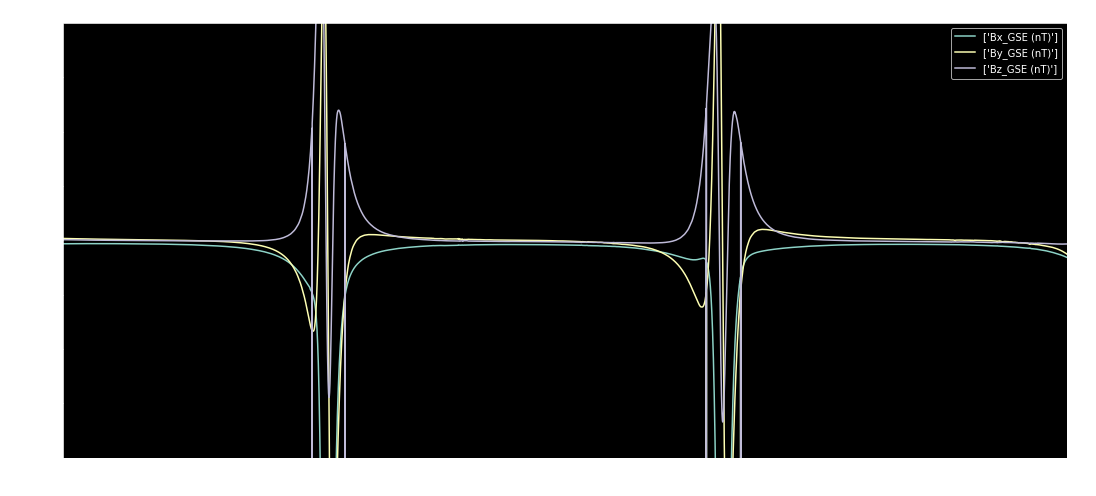

In [14]:
#Aplicando a função anterior para a variável mag_8sec_gse do dataset ERG_MGF_L2_8SEC, 
Vet_var = ['mag_8sec_gse']
#definindo o intervalo de tempo a ser plotado para o primeiro dia
time = [datetime.datetime(2020, 1, 3,0,0,0),datetime.datetime(2020, 1, 4,0,0,0)]
datax = data_arase['epoch_8sec']

plot_graph_dados(Vet_var,data_arase, datax, time)

##### No gráfico foram apresentados os dados das componentes x, y e z do campo magnético em nT, no período de tempo de um dia. Todas as informações plotadas no gráfico (título, legenda, eixos) foram extraídas diretamente do dataset a partir dos atributos de cada dado. É importante lembrar que como os datasets disponibilizados pelo CDAWeb são de diferentes projetos e satélites, a maneira como os dados estão estruturados pode ser diferente. Desse modo, é importante sempre na faze inicial observar os atributos do objeto "spacepy.pycdf.CDFCopy" criado ao utilizar a função get_data(), o que permite um maior conhecimento sobre os dados com os quais está trabalhando. A seguir é apresentado um exemplo de saída dos atributos.

In [15]:
#olhando os atributos do dataset ERG_MGF_L2_8SEC de maneira geral, como as informações pertinentes a ele
data_arase.attrs

{'Project': ['ERG>Exploration of Energization and Radiation in Geospace'],
 'Discipline': ['Space Physics>Magnetospheric Science'],
 'Source_name': ['ERG>Inner Magnetosphere'],
 'Data_type': ['l2_mgf>level 2 spin-averaged magnetic field data'],
 'Descriptor': ['MGF>Magnetic Field Experiment'],
 'DATA_VERSION': ['01'],
 'TITLE': ['Level 2 magnetic field data obtained by the Magnetic Field Experiment (MGF) instrument onboard the ERG satellite'],
 'GENERATED_BY': ['ERG Science Center, operated by ISAS/JAXA and ISEE/Nagoya University as a Joint Research Center for Space Science'],
 'GENERATION_DATE': ['erg_mgf_l2_8sec_20190930_v04.04'],
 'MODS': ['erg_mgf_l2_8sec_20190929_v04.04'],
 'Logical_file_id': ['erg_mgfs_l2_8sec_20200101000006_20200330090444'],
 'Logical_source': ['ERG_MGFS_L2_8SEC'],
 'Logical_source_description': ['DERIVED FROM: Magnetic Field Experiment (MGF) Level 2 spin-averaged magnetic field data, ARASE/ERG'],
 'PI_name': ['Ayako Matsuoka'],
 'PI_affiliation': ['Institute of

In [16]:
# olhando para os atributos da variável mag_8sec_gse do dataset ERG_MGF_L2_8SEC
data_arase['mag_8sec_gse'].attrs

{'FIELDNAM': 'B in GSE',
 'CATDESC': '8 sec resolution B in GSE coordinates',
 'VALIDMIN': -100000.0,
 'VALIDMAX': 100000.0,
 'SCALEMIN': '-99999.999',
 'SCALEMAX': '99999.999',
 'UNITS': 'nT',
 'UNIT_PTR': 'metavar0',
 'DEPEND_0': 'epoch_8sec',
 'LABLAXIS': 'B GSE',
 'LABL_PTR_1': 'metavar2',
 'MONOTON': 'false',
 'FORMAT': 'F10.3',
 'FILLVAL': -1e+31,
 'VAR_TYPE': 'data',
 'AVG_TYPE': 'standard',
 'DISPLAY_TYPE': 'time_series',
 'SCALETYP': 'linear',
 'DIM_SIZES': 3}

##### Agora vamos olhar em outro grupo de observatórios, o ACE, os datasets disponíveis com o mesmo tipo de instrumento de medição (campo magnético), do dataset anterior e ver como os resultados podem variar de grupo para grupo.

In [17]:
# Apresenta todos os datasets disponíveis na base de dados, considerando o grupo de onservatórios ACE
# e o tipo de instrumento Magnetic Fields (space)
datasets = cdas.get_datasets(observatoryGroup=['ACE'],
                             instrumentType='Magnetic Fields (space)')
print(datasets)

[{'Id': 'AC_AT_DEF', 'SpaseResourceId': 'spase://NASA/NumericalData/ACE/Attitude/Definitive/PT1H', 'Observatory': ['AC'], 'Instrument': ['DEF'], 'ObservatoryGroup': ['ACE'], 'InstrumentType': ['Ephemeris/Attitude/Ancillary', 'Particles (space)', 'Plasma and Solar Wind', 'Magnetic Fields (space)'], 'Label': 'ACE Hourly RTN, GSE and J2000 GCI Attitude direction cosines - E. C. Stone (California Institute of Technology)', 'TimeInterval': {'Start': '1997-08-26T00:00:00.000Z', 'End': '2022-02-01T13:00:00.000Z'}, 'PiName': 'E. C. Stone', 'PiAffiliation': 'California Institute of Technology', 'Notes': 'https://cdaweb.gsfc.nasa.gov/misc/NotesA.html#AC_AT_DEF', 'DatasetLink': [{'Title': 'The ACE Science Center  website', 'Text': 'Release notes and other info available at', 'Url': 'http://www.srl.caltech.edu/ACE/ASC/level2/orbit.html'}]}, {'Id': 'AC_H0_MFI', 'SpaseResourceId': 'spase://NASA/NumericalData/ACE/MAG/L2/PT16S', 'Observatory': ['AC'], 'Instrument': ['MAG'], 'ObservatoryGroup': ['ACE']

##### Como vimos na saída dos datassets possíveis fica bem evidente que os observatórios do grupo ACE possuem muito mais datasets com medições de campo magnético. Apenas para quesito de apresentação vamos escolher um dos datasets retornados anteriormente, o OMNI2_H0_MRG1HR que tem como descrição _"OMNI Combined, Definitive, Hourly IMF and Plasma Data, and Energetic Proton Fluxes, Time-Shifted to the Nose of the Earth's Bow Shock, plus Solar and Magnetic Indices - J.H. King, N. Papitashvili (ADNET, NASA GSFC)"_, e que apresentam dados disponíveis entre _{'Start': '1963-01-01T00:00:00.000Z', 'End': '2022-01-10T17:00:00.000Z'}_. Seguiremos o mesmo processo anterior.

In [18]:
# Retorna todas as variáveis presentes no dataset OMNI2_H0_MRG1HR, e salva em um pandas dataframe
variaveis_OMNI2 = pd.DataFrame(cdas.get_variables('OMNI2_H0_MRG1HR'))
variaveis_OMNI2

,Name,ShortDescription,LongDescription
0,Rot1800,,Bartels Rotation Number
1,IMF1800,,OMNI ID code for the source spacecraft for tim...
2,PLS1800,,OMNI ID code for the source spacecraft for tim...
3,IMF_PTS1800,,# fine time scale IMF points
4,PLS_PTS1800,,# fine time scale plasma points
5,ABS_B1800,,"1AU IP Average B Field Magnitude, nT, (last cu..."
6,F1800,,1AU IP Magnitude of average field vector (nT)
7,THETA_AV1800,,1AU IP Latitude/Theta of average B vector (deg)
8,PHI_AV1800,,1AU IP Longitude/Phi of average B vector (deg)
9,BX_GSE1800,,"1AU IP Bx (nT), GSE"


In [19]:
#  Pegando as variáveis de interesse para o dataset OMNI2_H0_MRG1HR, nesse caso todas.
vars = list(variaveis_OMNI2['Name'])
#definição do intervalo de tempo a ser extraido do dataset
time = ['2020-01-03T00:31:56.000Z', '2021-01-03T01:31:56.000Z']
# extraindo os dados do dataset OMNI2_H0_MRG1HR com as varoiávei e intervalo de tempo definidos
status, data_OMNI2 = cdas.get_data('OMNI2_H0_MRG1HR', vars, time[0], time[1])

In [20]:
dados_dataset_OMNI2 = pd.DataFrame(data_OMNI2.items())#Transformando o dicionario em um pandas dataframe
#Colocando o nome da variável como index e excluindo a coluna que ela representa
dados_dataset_OMNI2.rename(columns={0:'index', 1:'dados'},inplace=True)
dados_dataset_OMNI2.set_index(dados_dataset_OMNI2['index'], inplace=True)
dados_dataset_OMNI2.drop('index', axis=1, inplace=True)
dados_dataset_OMNI2

,dados
index,
Epoch_1800,"[2020-01-03 01:30:00, 2020-01-03 02:30:00, 202..."
Rot1800,"[2542, 2542, 2542, 2542, 2542, 2542, 2542, 254..."
IMF1800,"[51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 51, 5..."
PLS1800,"[52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 52, 5..."
IMF_PTS1800,"[62, 56, 61, 61, 61, 60, 61, 62, 61, 60, 59, 6..."
...,...
AU_INDEX,"[99999, 99999, 99999, 99999, 99999, 99999, 999..."
PC_N_INDEX,"[0.0, 0.4, 0.4, 0.3, 0.7, 0.9, 1.6, 1.2, 1.3, ..."
Solar_Lyman_alpha,"[0.005929, 0.005929, 0.005929, 0.005929, 0.005..."


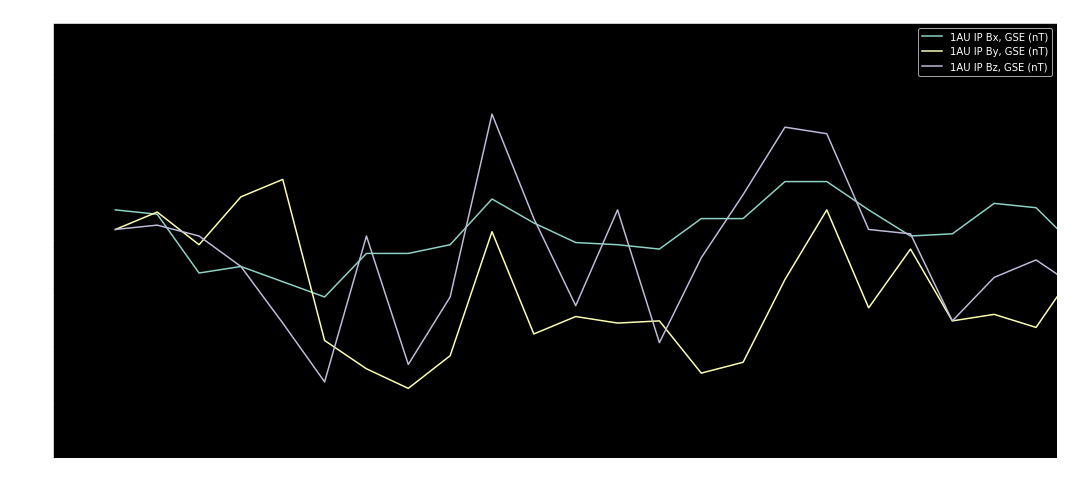

In [21]:
#Aplicando a função de plotagem criada anteriormente para as variáveis BX_GSE1800, BY_GSE1800, BZ_GSE1800, 
# do dataset OMNI2_H0_MRG1HR, para o período de um dia 
Vet_var = ['BX_GSE1800', 'BY_GSE1800', 'BZ_GSE1800']
#definindo o intervalo de tempo a ser plotado para o primeiro dia
time = [datetime.datetime(2020, 1, 3,0,0,0),datetime.datetime(2020, 1, 4,0,0,0)]
datax = data_OMNI2['Epoch_1800']

plot_graph_dados(Vet_var,data_OMNI2, datax, time)

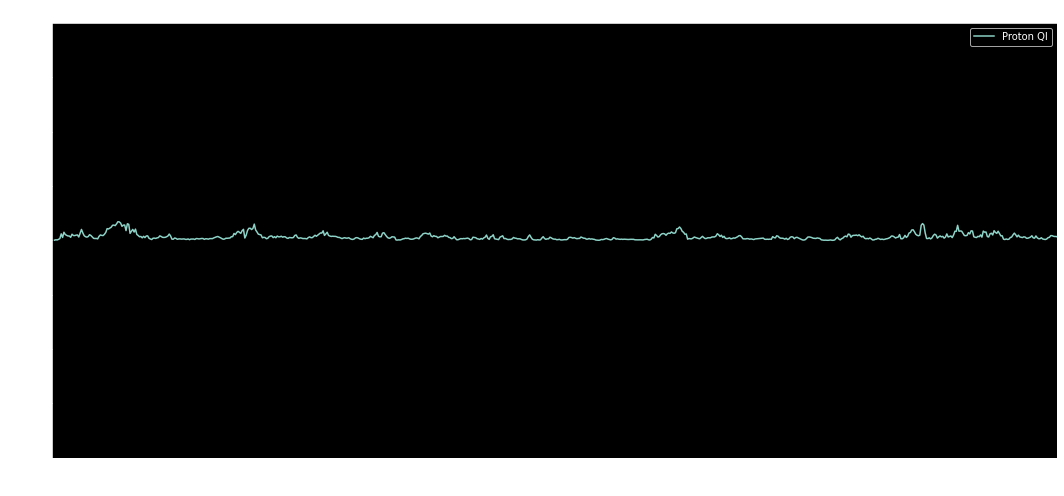

In [22]:
#Aplicando a função anterior para a variável Proton_QI18004 que representa "Solar wind (magnetic energy density)/(kinetic energy density)"
# do dataset data_OMNI2, 
Vet_var = ['Proton_QI1800']
#definindo o intervalo de tempo a ser plotado para o primeiro dia
time = [datetime.datetime(2020, 1, 3,0,0,0),datetime.datetime(2020, 2, 3,0,0,0)]
datax = data_OMNI2['Epoch_1800']

plot_graph_dados(Vet_var,data_OMNI2, datax, time)

##### A partir do que foi apresentado no código, podemos agora encontrar, entre os datasets que o CDAWeb disponibiliza, quais que disponibilizam as informações que podem ser necessárias para sua pesquisa/análise, considerando tanto o tipo de instrumento de medição quanto o intervalo de tempo de interesse. Desse modo, a partir do que foi discutido nos tópicos anteriores, serão criados novos notebooks abordando análises de dados específicos para aplicações de pesquisa, onde serão apresentados como tratar os dados com o pandas, como trabalhar com dados faltantes e outliers além de predições das condições espaciais a partir de séries temporais. 